# SPA detection post-processing

## Import packages

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use(['seaborn-deep', 'notebook'])

## Signal size and linewidth for different R-branch transitions

### Load data

In [49]:
def load_data(fname: str, n_gamma: int = 1) -> pd.DataFrame:
    """
    Loads data from csv and makes some new columns.
    """
    df =  pd.read_csv(fname, skiprows = 2)
    column_names = ['laser_detuning', 'n_photons', 'n_photons_sem']
    mapper = {old_name:new_name for old_name, new_name in zip(df.columns,column_names)}
    df.rename(columns = mapper, inplace = True)
    df['detuning_MHz'] = df.laser_detuning/(2*np.pi*1e6)
    
    df['norm_signal'] = df['n_photons']/n_gamma
    df['norm_signal_sem'] = df['n_photons_sem']/n_gamma
    
    return df


In [50]:
df_R0F1 = load_data("./saved_data/R(0),F'=2_bs_agg_n=10000_2022-05-19_16-30-33.csv", n_gamma = 1.92)
df_R1F2 = load_data("./saved_data/R(1),F'=3_bs_agg_n=10000_2022-05-24_12-09-12.csv", n_gamma = 2.1)

Text(0, 0.5, 'Mean number of photons\nper molecule')

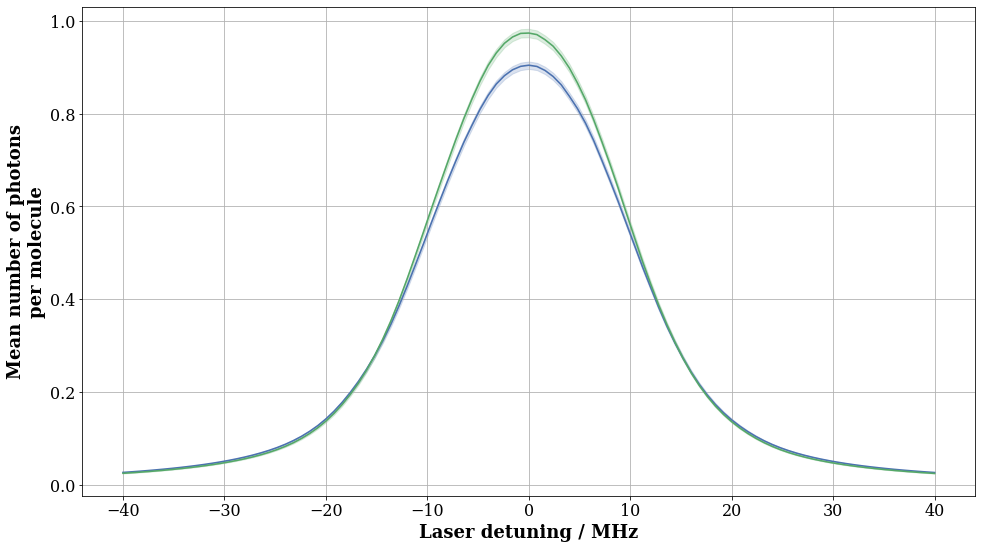

In [52]:
fig, ax = plt.subplots()
ax.plot(df_R0F1.detuning_MHz, df_R0F1.n_photons, color = 'C0', label = "R(0), F' = 2")
ax.fill_between(df_R0F1.detuning_MHz, df_R0F1.n_photons-df_R0F1.n_photons_sem, df_R0F1.n_photons+df_R0F1.n_photons_sem, color = 'C0', alpha = 0.2)
ax.plot(df_R1F2.detuning_MHz, df_R1F2.n_photons, color = 'C1', label = "R(1), F' = 3")
ax.fill_between(df_R1F2.detuning_MHz, df_R1F2.n_photons-df_R1F2.n_photons_sem, df_R1F2.n_photons+df_R1F2.n_photons_sem, color = 'C1', alpha = 0.2)
ax.set_xlabel('Laser detuning / MHz')
ax.set_ylabel('Mean number of photons\nper molecule')

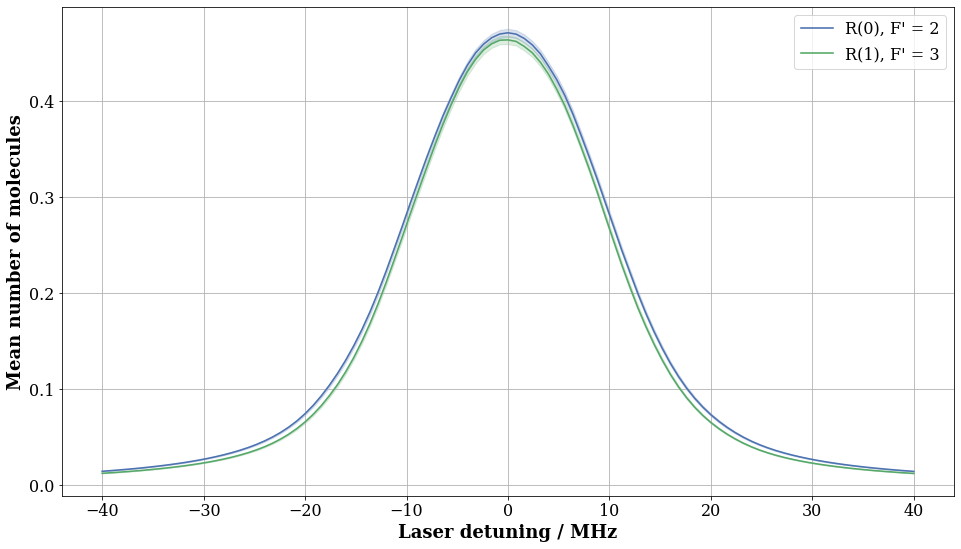

In [54]:
fig, ax = plt.subplots()
ax.plot(df_R0F1.detuning_MHz, df_R0F1.norm_signal, color = 'C0', label = "R(0), F' = 2")
ax.fill_between(df_R0F1.detuning_MHz, df_R0F1.norm_signal-df_R0F1.norm_signal_sem, df_R0F1.norm_signal+df_R0F1.norm_signal_sem, color = 'C0', alpha = 0.2)
ax.plot(df_R1F2.detuning_MHz, df_R1F2.norm_signal, color = 'C1', label = "R(1), F' = 3")
ax.fill_between(df_R1F2.detuning_MHz, df_R1F2.norm_signal-df_R1F2.norm_signal_sem, df_R1F2.norm_signal+df_R1F2.norm_signal_sem, color = 'C1', alpha = 0.2)
ax.set_xlabel('Laser detuning / MHz')
ax.set_ylabel('Mean number of molecules')
ax.legend()